<a href="https://colab.research.google.com/github/vijaynaykodi/deep_learning/blob/main/LLM_FlanT5_Small_Demo_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



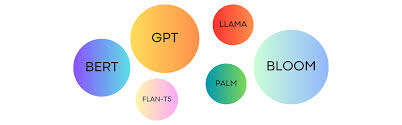

#  **Installing Python Libraries**


In [1]:
%%bash
pip install transformers
pip install sentencepiece
pip install nltk
pip install datasets
pip install transformers[torch]
pip install tokenizers
pip install evaluate
pip install rouge_score
pip install sentencepiece
pip install huggingface_hub
pip install accelerate -U
#pip install transformers[torch]


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=dbfb3824c31e1cfd2fae8c38080715e560757122450bfe635bff13f3a4e1b730
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


## **Loading the T5 small model and verifying the same.**

In [2]:
import torch
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
from transformers import Seq2SeqTrainingArguments
import accelerate
from transformers import T5Tokenizer, TFT5Model

In [3]:
import nltk
import evaluate
import numpy as np
from datasets import load_dataset
from transformers import T5Tokenizer, DataCollatorForSeq2Seq
from transformers import T5ForConditionalGeneration, Seq2SeqTrainingArguments, Seq2SeqTrainer

In [4]:
model = AutoModelForSeq2SeqLM.from_pretrained("google/flan-t5-small")
tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-small")

inputs = tokenizer("A step by step recipe to make banana cake:", return_tensors="pt")
outputs = model.generate(**inputs)
print(tokenizer.batch_decode(outputs, skip_special_tokens=True))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/308M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


['Make a banana cake.']


## **Printing the Model Layer and their Dimensions.**

In [20]:
for name, module in model.named_modules():
    if isinstance(module, torch.nn.Module):
      pass
       # print(f"{name}: {module}")

## **Total Parameters in the model**

In [21]:
print(sum(p.numel() for p in model.parameters()))

76961152


## **Seting the tensor in final layer (decoder.final_layer_norm.weight) to all zeros.**

In [ ]:
model.decoder.final_layer_norm.weight.data = torch.zeros_like(model.decoder.final_layer_norm.weight.data)

## **Verify if the Q&A task works after resetting the weights of the above layer.**

In [ ]:
inputs = tokenizer("A step by step recipe to make banana cake:", return_tensors="pt")
outputs = model.generate(**inputs)
print(tokenizer.batch_decode(outputs, skip_special_tokens=True))

['']


Q&A Task is not woking as previous, as we have set the tensor to 0

# **Replace the decoder.final_layer_norm.weight with a layer of smaller dimensions and adjust all the dependent layers to match the dimension**

In [22]:
sum(model.decoder.final_layer_norm.numel)

AttributeError: ignored

## **Reload the original google/flan-t5-small model.**

In [1]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

model = AutoModelForSeq2SeqLM.from_pretrained("google/flan-t5-small")
tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-small")

inputs = tokenizer("A step by step recipe to make pasta:", return_tensors="pt")
outputs = model.generate(**inputs)
print(tokenizer.batch_decode(outputs, skip_special_tokens=True))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/308M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


['Pour a cup of bolognese into a large bowl and add the pasta']



# **Train the model for a Q&A task that takes a context as addi'onal input along with the question.**

In [36]:
! pip install -U accelerate
! pip install -U transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 15.5 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.35.2
    Uninstalling transformers-4.35.2:
      Successfully uninstalled transformers-4.35.2


In [4]:
import accelerate
import transformers

transformers.__version__, accelerate.__version__

('4.35.2', '0.25.0')

In [5]:
import torch
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments


In [6]:
model = AutoModelForSeq2SeqLM.from_pretrained("google/flan-t5-small")
tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-small")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/308M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

In [7]:
from datasets import load_dataset
raw_datasets = load_dataset("squad_v2")

Generating train split:   0%|          | 0/130319 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11873 [00:00<?, ? examples/s]

In [11]:
raw_datasets

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 130319
    })
    validation: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 11873
    })
})

In [15]:
print("Context: ", raw_datasets["train"][1000]["context"])
print("Question: ", raw_datasets["train"][1000]["question"])
print("Answer: ", raw_datasets["train"][1000]["answers"])

Context:  Two Polish friends in Paris were also to play important roles in Chopin's life there. His fellow student at the Warsaw Conservatory, Julian Fontana, had originally tried unsuccessfully to establish himself in England; Albert Grzymała, who in Paris became a wealthy financier and society figure, often acted as Chopin's adviser and "gradually began to fill the role of elder brother in [his] life." Fontana was to become, in the words of Michałowski and Samson, Chopin's "general factotum and copyist".
Question:  What nationality were the two friends who served as a pivotal influence in Frédéric's life while in Paris?
Answer:  {'text': ['Polish'], 'answer_start': [4]}


In [17]:
raw_datasets['train']

Dataset({
    features: ['id', 'title', 'context', 'question', 'answers'],
    num_rows: 130319
})

In [21]:
train = raw_datasets['train'].train_test_split(test_size=0.2, seed=42)
test = raw_datasets['validation'].train_test_split(test_size=0.5, seed=42)

In [27]:
train

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 104255
    })
    test: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 26064
    })
})

In [46]:
train['train']

Dataset({
    features: ['id', 'title', 'context', 'question', 'answers'],
    num_rows: 104255
})

In [ ]:
train_encodings = tokenizer(train['train']['context'], train['train']['question'], truncation=True, padding=True)
val_encodings = tokenizer(train['test']['context'], train['test']['question'], truncation=True, padding=True)

In [45]:
def add_token_positions(encodings, answers):
      start_positions = []
      end_positions = []
      for i in range(len(answers)):
          start_positions.append(encodings.char_to_token(i, answers[i]['answer_start']))
          end_positions.append(encodings.char_to_token(i, answers[i]['answer_end']))

          # if start position is None, the answer passage has been truncated
          if start_positions[-1] is None:
              start_positions[-1] = tokenizer.model_max_length

          # if end position is None, the 'char_to_token' function points to the space before the correct token - > add + 1
          if end_positions[-1] is None:
              end_positions[-1] = encodings.char_to_token(i, answers[i]['answer_end'] + 1)
      encodings.update({'start_positions': start_positions, 'end_positions': end_positions})

add_token_positions(train_encodings, train['train']['answers'])
add_token_positions(val_encodings, train['test']['answers'])


NameError: ignored

In [36]:
from transformers import AutoModelForSeq2SeqLM, Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=3,              # total number of training epochs
    per_device_train_batch_size=16,  # batch size per device during training
    per_device_eval_batch_size=64,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
    remove_unused_columns=False
)

model = AutoModelForSeq2SeqLM.from_pretrained("google/flan-t5-small")
#DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased")

trainer = Trainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=raw_datasets['train'],         # training dataset
    eval_dataset=raw_datasets['validation'],# evaluation dataset

)

trainer.train()

RuntimeError: ignored

In [33]:
# Global Parameters
L_RATE = 3e-4
BATCH_SIZE = 10
PER_DEVICE_EVAL_BATCH = 4
WEIGHT_DECAY = 0.01
SAVE_TOTAL_LIM = 3
NUM_EPOCHS = 3

# Set up training arguments
training_args = Seq2SeqTrainingArguments(
   output_dir="./results",
   evaluation_strategy="epoch",
   learning_rate=L_RATE,
   per_device_train_batch_size=BATCH_SIZE,
   per_device_eval_batch_size=PER_DEVICE_EVAL_BATCH,
   weight_decay=WEIGHT_DECAY,
   save_total_limit=SAVE_TOTAL_LIM,
   num_train_epochs=NUM_EPOCHS,
   predict_with_generate=True,
   push_to_hub=False
)

ImportError: ignored

In [ ]:
# Map the preprocessing function across our dataset
tokenized_dataset = yahoo_answers_qa.map(preprocess_function, batched=True)

NameError: ignored

In [ ]:
nltk.download("punkt", quiet=True)
metric = evaluate.load("rouge")

In [ ]:
def compute_metrics(eval_preds):
   preds, labels = eval_preds

   # decode preds and labels
   labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
   decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)
   decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

   # rougeLSum expects newline after each sentence
   decoded_preds = ["\n".join(nltk.sent_tokenize(pred.strip())) for pred in decoded_preds]
   decoded_labels = ["\n".join(nltk.sent_tokenize(label.strip())) for label in decoded_labels]

   result = metric.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)

   return result

In [ ]:
# We prefix our tasks with "answer the question"
prefix = "Please answer this question: "

# Define the preprocessing function

def preprocess_function(examples):
   """Add prefix to the sentences, tokenize the text, and set the labels"""
   # The "inputs" are the tokenized answer:
   inputs = [prefix + doc for doc in examples["question"]]
   model_inputs = tokenizer(inputs, max_length=128, truncation=True)

   # The "labels" are the tokenized outputs:
   labels = tokenizer(text_target=examples["answer"],
                      max_length=512,
                      truncation=True)

   model_inputs["labels"] = labels["input_ids"]
   return model_inputs

In [31]:
# Global Parameters
L_RATE = 3e-4
BATCH_SIZE = 8
PER_DEVICE_EVAL_BATCH = 4
WEIGHT_DECAY = 0.01
SAVE_TOTAL_LIM = 3
NUM_EPOCHS = 3

# Set up training arguments
training_args = Seq2SeqTrainingArguments(
   output_dir="./results",
   evaluation_strategy="epoch",
   learning_rate=L_RATE,
   per_device_train_batch_size=BATCH_SIZE,
   per_device_eval_batch_size=PER_DEVICE_EVAL_BATCH,
   weight_decay=WEIGHT_DECAY,
   save_total_limit=SAVE_TOTAL_LIM,
   num_train_epochs=NUM_EPOCHS,
   predict_with_generate=True,
   push_to_hub=False
)

ImportError: ignored

In [ ]:
!pip install transformers[torch]

In [34]:
trainer = Seq2SeqTrainer(
   model=model,
   args=training_args,
   train_dataset=tokenized_dataset["train"],
   eval_dataset=tokenized_dataset["test"],
   tokenizer=tokenizer,
   data_collator=data_collator,
   compute_metrics=compute_metrics
)

NameError: ignored

## ***TEST***

In [ ]:
from transformers import T5Tokenizer, TFT5Model


model = AutoModelForSeq2SeqLM.from_pretrained("google/flan-t5-small")
tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-small")

# tokenizer = T5Tokenizer.from_pretrained('t5-small')
# model = TFT5Model.from_pretrained('t5-small')
inputs = tokenizer.encode("Hello, my dog is cute", return_tensors="pt")  # Batch size 1
outputs = model(inputs, decoder_input_ids=inputs)
last_hidden_states = outputs[0]
print (last_hidden_states)

tensor([[[-58.6952,  -4.6953,  -8.0339,  ..., -58.6810, -58.7277, -58.3533],
         [-58.2242,  -5.3932,  -7.6370,  ..., -58.2214, -58.2355, -57.8163],
         [-58.2978,  -7.4739,  -7.7691,  ..., -58.2634, -58.2852, -57.8826],
         ...,
         [-59.9523,  -9.3779, -10.1506,  ..., -60.0262, -60.0440, -59.6826],
         [-57.4647,  -6.0582,  -6.6909,  ..., -57.4795, -57.4897, -57.0870],
         [-72.5615,  -9.8599,  -9.6206,  ..., -72.5931, -72.6357, -72.2894]]],
       grad_fn=<UnsafeViewBackward0>)


In [ ]:
# Import the necessary libraries.
import transformers
import torch

# Load the LLM model.
model = transformers.AutoModelForSeq2SeqLM.from_pretrained("google/flan-t5-small")

# Create a tokenizer for the LLM model.
tokenizer = transformers.AutoTokenizer.from_pretrained("google/flan-t5-small")

# Preprocess the data.
data = [
    "The quick brown fox jumped over the lazy dog.  ",
    "The dog chased the cat up the tree.    ",
    "The cat sat on the mat.      "
]
encoded_data = tokenizer(data,padding=True, return_tensors="pt")
print (encoded_data)

# Create a dataset for training the LLM model.
train_dataset = torch.utils.data.TensorDataset(encoded_data["input_ids"], encoded_data["attention_mask"])

# Create a data loader for training the LLM model.
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16)

# Train the LLM model.
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)

model = AutoModelForSeq2SeqLM.from_pretrained("google/flan-t5-small")

model.train()
for epoch in range(10):
    for batch in train_loader:
        input_ids, attention_mask = batch
        outputs = model(input_ids, attention_mask)
        loss = outputs[0]
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

# Evaluate the LLM model.
model.eval()
with torch.no_grad():
    for batch in train_loader:
        input_ids, attention_mask = batch
        outputs = model(input_ids, attention_mask)
        loss = outputs[0]
        print(loss)

# Fine-tune the LLM model.
for epoch in range(10):
    for batch in train_loader:
        input_ids, attention_mask = batch
        outputs = model(input_ids, attention_mask)
        loss = outputs[0]
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

# Save the fine-tuned LLM model.
model.save_pretrained("my_finetunes_LLM")

{'input_ids': tensor([[   37,  1704,  4216,     3, 20400,     3, 16287,   147,     8, 19743,
          1782,     5,     3,     1],
        [   37,  1782, 15389,    26,     8,  1712,    95,     8,  2195,     5,
             3,     1,     0,     0],
        [   37,  1712,     3,     7,   144,    30,     8,  6928,     5,     3,
             1,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]])}


ValueError: ignored